In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import *
import pyforest
%matplotlib inline

In [2]:
def easy_plot(i):
    plt.figure()
    plt.imshow(db[i]['img'], cmap='gray' )
    plt.imshow(db[i]['lesion_mask'])
    plt.axis('off')
    plt.show()

In [250]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        max_lesion_size_mm=1.0,
        extract_patches=False,
        # extract_patches_method='all',  # 'centered'
        # patch_size=256,
        # stride=256,
        # min_breast_fraction_roi=0.8,
        normalize=None,
        n_jobs=-1,
)

In [258]:
db.img_df

,img_id,n_rois,side,view,filename,acr,artifact,birads,case_id,finding_notes,...,pectoral_muscle,mass,micros,distortion,asymmetry,breast_bbox,partition,case_label,img_label,label
0,20586908,42,R,CC,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,2,6c613a14b80a8591,nodulo mama direita + micros,...,False,True,True,False,False,"[(1374, 64), (3328, 3527)]",train,abnormal,abnormal,normal
1,20586934,62,L,CC,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,5,6c613a14b80a8591,nodulo esquerda + micros,...,False,True,True,False,False,"[(20, 113), (1697, 3443)]",train,abnormal,abnormal,normal
2,20586960,45,R,MLO,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,2,6c613a14b80a8591,2nodulos mama direita + micros,...,False,True,True,False,False,"[(1096, 6), (3328, 3211)]",train,abnormal,abnormal,normal
3,20586986,16,L,MLO,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,5,6c613a14b80a8591,nodulo mama esquerda + micros,...,False,True,True,False,False,"[(0, 6), (1900, 4078)]",train,abnormal,abnormal,normal
4,20587148,3,R,CC,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,2,fd746d25eb40b3dc,calcificações,...,False,False,True,False,False,"[(1604, 247), (2560, 2782)]",train,abnormal,abnormal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,53587508,1,R,CC,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,2,d2befe622e188943,micro,...,False,False,True,False,False,"[(993, 63), (2560, 2951)]",train,abnormal,abnormal,normal
306,53587572,21,L,MLO,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,2,11e6732579acf692,calcificações benignas,...,False,False,True,False,False,"[(0, 6), (2021, 3973)]",train,abnormal,abnormal,normal
307,53587599,24,L,CC,C:\Users\acort\Documents\calc-det\data\INbreas...,2,False,2,11e6732579acf692,calcificações benignas,...,False,False,True,False,False,"[(0, 367), (1951, 4033)]",train,abnormal,abnormal,normal
308,53587663,12,R,CC,C:\Users\acort\Documents\calc-det\data\INbreas...,1,False,2,5fb370d4c1c71974,cc direita - calcificações + nodulo benigno - ...,...,False,True,True,False,False,"[(1675, 577), (3328, 3471)]",train,abnormal,abnormal,normal


In [266]:
db[25].keys()

dict_keys(['idx', 'lab', 'img', 'lesion_bboxes', 'lesion_mask'])

<IPython.core.display.Javascript object>

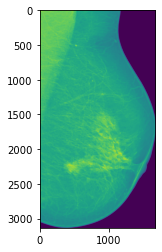

In [267]:
db.img_df[db.img_df.img_id == 20588046].index.values[0]
db[25]['lesion_mask']
plt.imshow(db[25]['img'])

In [ ]:
#TO DO: consider if the bbox roi lesions are in the image borders?

patch_half_distance = self.patch_size//2  # half distance floor

roi_img_patches = []
roi_mask_patches = []

for index, values in rois_subset_df.iterrows():
    bbox_coords = literal_eval(values['lesion_bbox_crop'])
    roi_bb_dims = (bbox_coords[1][0] - bbox_coords[0][0] + 1,
                   bbox_coords[1][1] - bbox_coords[0][1] + 1)

    # If patch_size smaller than roi bbox, extract as many patches as posible
    if self.patch_size < roi_bb_dims[0] or self.patch_size < roi_bb_dims[1]:
        #padd image enough to slice roi in multiple patches
        # change padding to custom
        target_roi = padd_roi_custom(image,roi_bb_dims, bbox_coords, patch_size)
        target_roi_mask = padd_roi_custom(mask,roi_bb_dims, bbox_coords, patch_size)

        target_roi_img_patches = slice_image(
            target_roi, window_size=self.path_size, stride=self.stride)
        target_roi_mask_patches = slice_image(
            target_roi_mask, window_size=self.path_size, stride=self.stride)

        roi_img_patches.extend(target_roi_img_patches)
        roi_mask_patches.extend(target_roi_mask_patches)

    # If patch_size is bigger, extract the patch centered in the roi center
    else:
        roi_center = literal_eval(values['center_crop'])
        if patch_size % 2 == 0:
            patch_bbox = [(roi_center[0]-(patch_half_distance-1), roi_center[1]-(patch_half_distance-1)),
                          (roi_center[0]+patch_half_distance, roi_center[1]+patch_half_distance)]
        else:
            patch_bbox = [(roi_center[0]-patch_half_distance, roi_center[1]-patch_half_distance),
                          (roi_center[0]+patch_half_distance, roi_center[1]+patch_half_distance)]

            roi_img_patches.extend(image[patch_bbox[0][0]:patch_bbox[1][0],
                                         patch_bbox[0][1]:patch_bbox[1][1]])
            roi_mask_patches.extend(mask[patch_bbox[0][0]:patch_bbox[1][0],
                                         patch_bbox[0][1]:patch_bbox[1][1]])

def padd_roi_custom(image: np.ndarray,roi_bbox_dims: tuple,bbox_coords: list, window_size: int,):
    """
    Selects corresponding padding and enlarge the given target roi to ensure
    safe slicing of the roi with a given window size and any stride multiple of it.

    Args:
        image (np.ndarray): Original image where padded roi will be extracted.
        roi_bbox_dims (tuple): Target roi pixel dimensions, as (height (rows), width (columns)).
        bbox_coords (list): Bounding box coordinates of target roi, as [(top left coordinates),(bottom right coordinates)].
        window_size (int): Window size of slicing.

    Returns:
        padded roi (np.ndarray): target roi padded for consequent slicing
    """
    padded_x_len = np.ceil(roi_bbox_dims[0] / window_size) * window_size - roi_bbox_dims[0]
    padded_y_len = np.ceil(roi_bbox_dims[1] / window_size) * window_size - roi_bbox_dims[1]
    return image[bbox_coords[0][0]-padded_x_len//2+padded_x_len%2:bbox_coords[1][0]+padded_x_len//2,
            bbox_coords[0][1]-padded_y_len//2+padded_y_len%2:bbox_coords[1][1]+padded_y_len//2]

In [3]:
from ast import literal_eval

In [4]:
rois_df = pd.read_csv(r'C:\Users\acort\Documents\calc-det\data\INbreast Release 1.0\rois_metadata.csv', nrows=None, index_col=0)
img_df = pd.read_csv(r'C:\Users\acort\Documents\calc-det\data\INbreast Release 1.0\images_metadata.csv', nrows=None, index_col=0)

In [163]:
rois_df.loc[rois_df.img_id == image_id,'lesion_type'].unique()

array(['calcification', 'spiculated_region', 'mass'], dtype=object)

30011507 30011507.png
image/mask dimensions (cropped) (2529, 848)
number of rois: 22  of type:  ['calcification']


<IPython.core.display.Javascript object>

(-0.5, 847.5, 2528.5, -0.5)

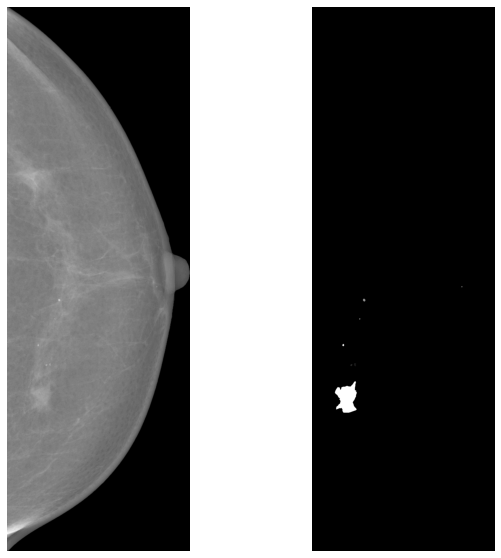

In [29]:
#get rois_subset_df
idx = 200
image_id = img_df['img_id'].iloc[idx]
rois_subset_df = rois_df.loc[(rois_df.img_id == image_id) & (rois_df.lesion_type == 'calcification')]

#save image and mask
full_img_path = Path('C:/Users/acort/Documents/calc-det/data/INbreast Release 1.0/AllPNGs/full_imgs')
full_mask_path = Path('C:/Users/acort/Documents/calc-det/data/INbreast Release 1.0/AllMasks/full_imgs')
filename = Path(img_df['filename'].iloc[idx]).name
img_path = full_img_path / filename
image = cv2.imread(str(img_path), cv2.IMREAD_ANYDEPTH)
img_id = img_df['img_id'].iloc[idx]
mask_path = full_mask_path / f'{img_id}_lesion_mask.png'
mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

print(image_id,filename)
print('image/mask dimensions (cropped)',image.shape)
print('number of rois:',rois_subset_df.shape[0],' of type: ',rois_subset_df.lesion_type.unique())

f,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(image,cmap='gray')
ax[1].imshow(mask,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

In [17]:
rois_subset_df.loc[rois_subset_df.index_in_image == 1,['lesion_type','lesion_bbox_crop','number_of_points','stored']]

,lesion_type,lesion_bbox_crop,number_of_points,stored
1351,calcification,"[(650, 2073), (650, 2073)]",1,True


In [18]:
np.unique(mask).shape

<IPython.core.display.Javascript object>

(43,)

In [5]:
np.unique(mask,return_counts=True)

<IPython.core.display.Javascript object>

(array([ 0,  1,  3,  4,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 43, 47, 51, 84, 91, 92, 93, 94], dtype=uint8),
 array([3564295,       1,  571500,   15013,      69,      69,      51,
             26,      25,      25,      15,      19,      18,      23,
             32,      89,      30,      20,      12,      18,     110,
             45,      34,      20,      20,      39,      13,     100,
             14,      30,      41,      46,     130,      20,      27,
             32,      12,      26,      29,      38,  131013,      12,
              1], dtype=int64))

In [9]:
rois_subset_df['index_in_image'] #[['lesion_bbox_crop','lesion_type','index_in_image']]

<bound method Series.unique of 1351     1
1352     2
1355     5
1356     6
1357     7
        ..
1439    89
1440    90
1441    91
1443    93
1444    94
Name: index_in_image, Length: 91, dtype: int64>

In [23]:
#Other variables for test
patch_size = 100
stride = 100
min_breast_fraction_roi = 0.8

In [36]:
#TO DO: consider if the bbox roi lesions are in the image borders?

patch_half_distance = patch_size // 2  # half distance floor

roi_img_patches = []
roi_mask_patches = []

for index, values in rois_subset_df.iterrows():
    bbox_coords = literal_eval(values['lesion_bbox_crop']) #load coords function
    roi_bb_dims = (bbox_coords[1][0] - bbox_coords[0][0] + 1,
                   bbox_coords[1][1] - bbox_coords[0][1] + 1)

    # If patch_size smaller than roi bbox, extract as many patches as posible
    if patch_size < roi_bb_dims[0] or patch_size < roi_bb_dims[1]:
        #padd image enough to slice roi in multiple patches
        target_roi = padd_roi_custom(image,roi_bb_dims, bbox_coords, patch_size)
        target_roi_mask = padd_roi_custom(mask,roi_bb_dims, bbox_coords, patch_size)

        target_roi_img_patches = slice_image(
            target_roi, window_size=patch_size, stride=stride)
        target_roi_mask_patches = slice_image(
            target_roi_mask, window_size=patch_size, stride=stride)
        
        roi_img_patches.extend(target_roi_img_patches)
        roi_mask_patches.extend(target_roi_mask_patches)
        print(f'big roi: {index}')
        print(f'number of patches: {target_roi_mask_patches.shape}')

    # If patch_size is bigger, extract the patch centered in the roi center
    else:
        roi_center = literal_eval(values['center_crop'])
        if patch_size % 2 == 0:
            patch_bbox = [(roi_center[0]-(patch_half_distance-1), roi_center[1]-(patch_half_distance-1)),
                          (roi_center[0]+patch_half_distance, roi_center[1]+patch_half_distance)]
            #print('first if')
        else:
            patch_bbox = [(roi_center[0]-patch_half_distance, roi_center[1]-patch_half_distance),
                          (roi_center[0]+patch_half_distance, roi_center[1]+patch_half_distance)]
            #print('second if')
        
        roi_img_patches.append(image[patch_bbox[0][1]:patch_bbox[1][1]+1,patch_bbox[0][0]:patch_bbox[1][0]+1])
        roi_mask_patches.append(mask[patch_bbox[0][1]:patch_bbox[1][1]+1,patch_bbox[0][0]:patch_bbox[1][0]+1])
    #break

# Filter mask patches already filtered from the rois_df
present_indx = rois_subset_df.loc[:,'index_in_image'].tolist()
indexes_to_filter = \
    [index for index in np.unique(roi_mask_patches) if index not in present_indx]
for index in indexes_to_filter:
    roi_mask_patches = np.where(roi_mask_patches == index, 0, roi_mask_patches)

# Merge normal patches with centered rois ones

# Extract all patches
image = padd_image(image, patch_size)
mask = padd_image(mask, patch_size)
all_image_patches = slice_image(image, window_size=patch_size, stride=stride)
all_mask_patches = slice_image(mask, window_size=patch_size, stride=stride)

mask_normal_patches = np.zeros(all_mask_patches.shape[0]).astype(np.bool8)

for index,patch in enumerate(all_mask_patches):
    breast_perc = (all_image_patches[index] > 0).sum() / patch_size**2
    if not np.any(patch) and breast_perc >= min_breast_fraction_roi:
        mask_normal_patches[index] = True

# mask_normal_patches = [False if np.any(patch) and patch.index else True for patch in all_mask_patches]

centered_image_patches = np.concatenate((all_image_patches[mask_normal_patches,:,:],roi_img_patches))
centered_mask_patches = np.concatenate((all_mask_patches[mask_normal_patches,:,:],roi_mask_patches))



print('number of centered roi patches: ', np.shape(roi_img_patches))
print('number of total patches: ', np.shape(centered_image_patches))


number of centered roi patches:  (22, 100, 100)
number of total patches:  (140, 100, 100)


In [28]:
breast_perc

0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

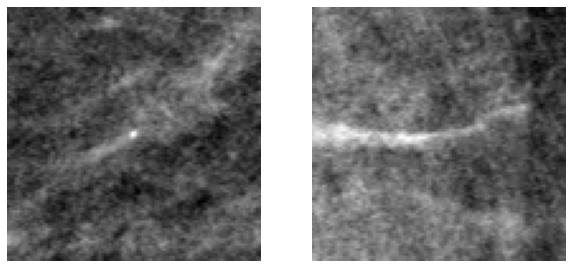

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

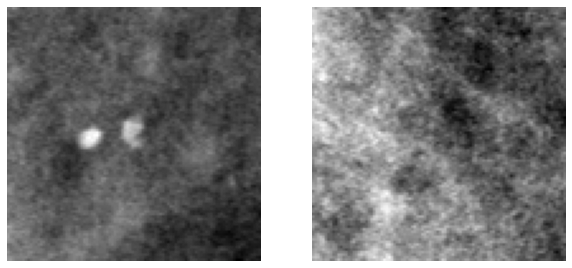

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

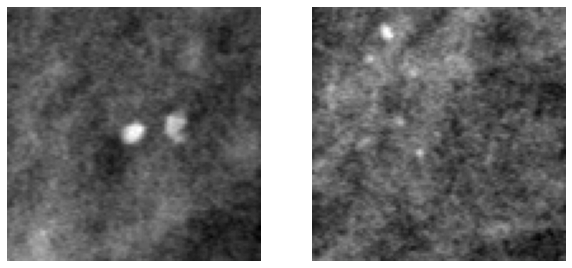

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

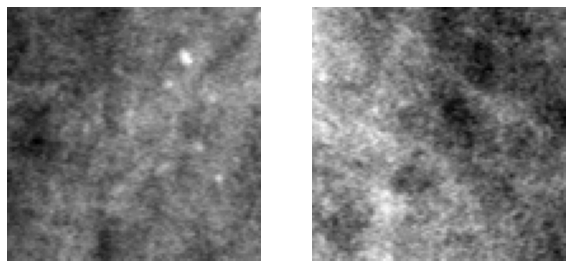

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

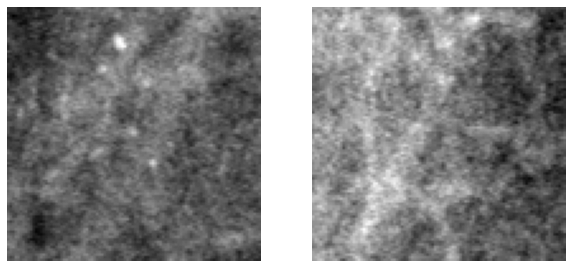

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

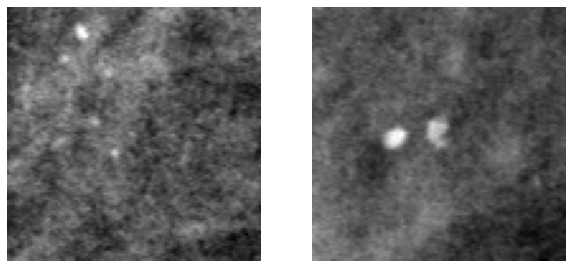

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

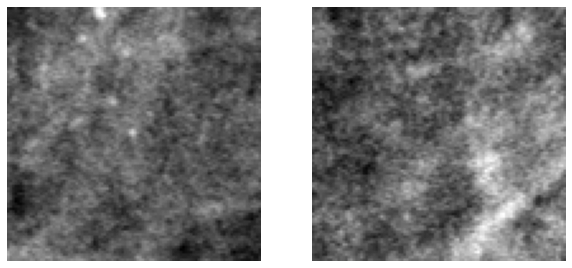

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

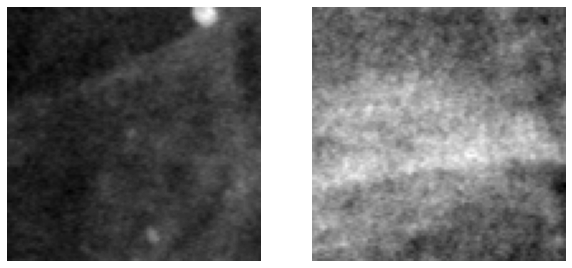

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

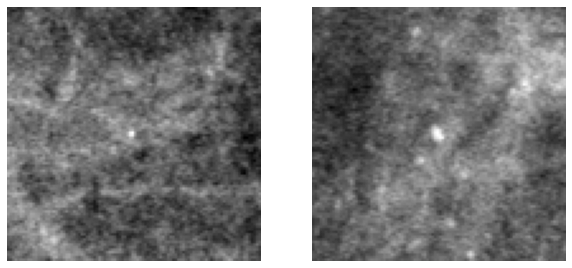

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

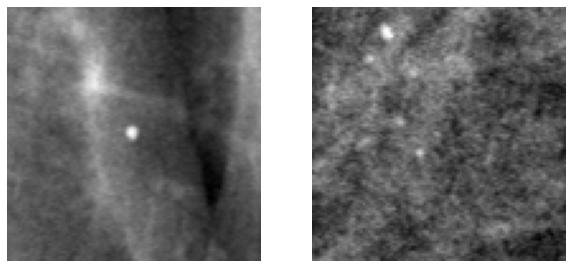

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

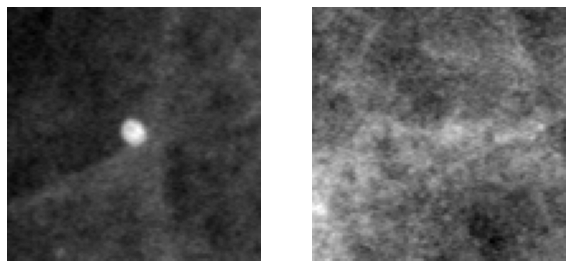

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

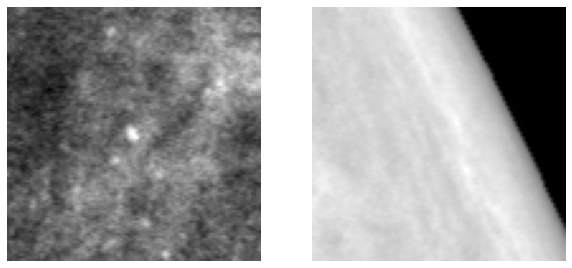

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

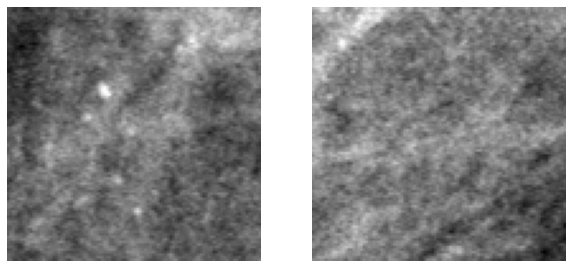

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

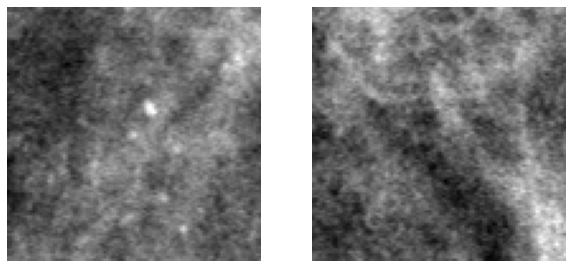

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

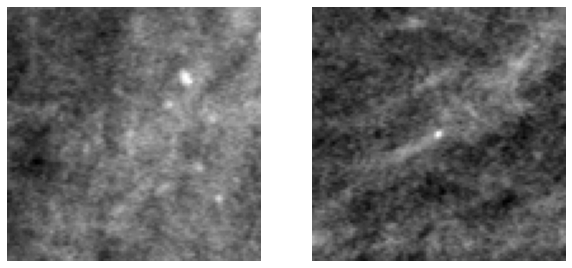

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

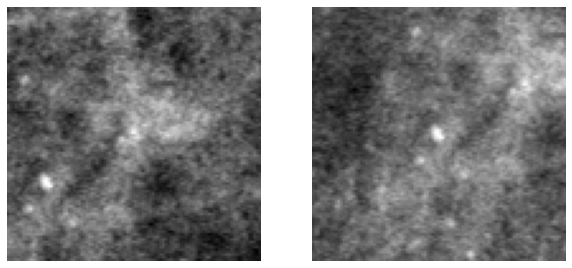

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

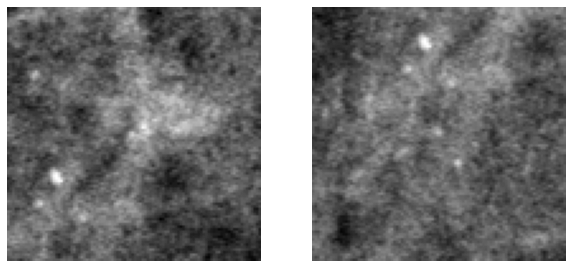

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

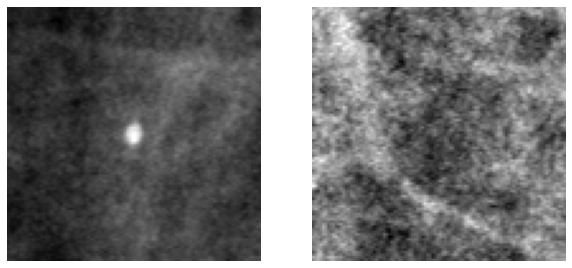

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

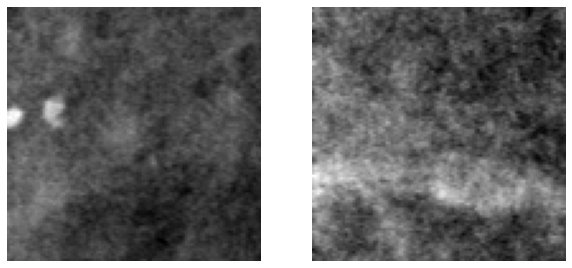

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

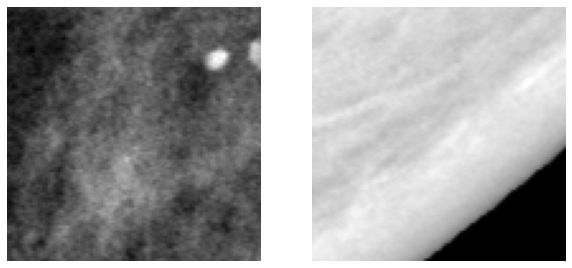

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

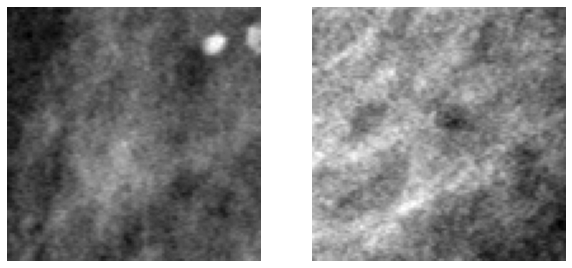

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

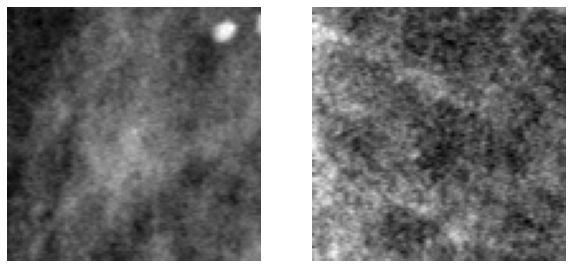

In [38]:
for idx,p in enumerate(roi_img_patches):
    simple_im_show2(p,centered_image_patches[np.random.choice(140,1)[0]]) #np.random.choice(256,1)[0]

In [9]:
def simple_im_show2(img, mask, figsize=(10, 10)):
    fig, ax = plt.subplots(1,2, figsize=figsize)
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(mask, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()

In [ ]:
#mask_normal_patches = np.ones(all_mask_patches.shape)

# for index,patch in enumerate(all_mask_patches):
#     if np.any(patch):
#         mask_normal_patches[index] = 0

In [34]:
a = np.eye(10)

<IPython.core.display.Javascript object>

In [ ]:
[f1, f2]

In [28]:
testarray = np.zeros(roi_mask_patches.shape)
testarray[0] = 1

<IPython.core.display.Javascript object>

In [282]:
roi_img_patches[0].shape

(100, 100)

In [310]:
np.unique(roi_mask_patches,return_counts=True)

(array([ 0, 13], dtype=uint8), array([169680,    320], dtype=int64))

In [312]:
rois_subset_df[['lesion_bbox_crop','lesion_type','index_in_image']]

,lesion_bbox_crop,lesion_type,index_in_image
1003,"[(1005, 920), (1005, 920)]",calcification,1
1004,"[(1000, 926), (1000, 926)]",calcification,2
1005,"[(507, 1157), (512, 1165)]",calcification,3
1006,"[(536, 1147), (536, 1147)]",calcification,4
1007,"[(679, 1160), (679, 1160)]",calcification,5
1008,"[(485, 1150), (485, 1150)]",calcification,6
1009,"[(458, 1158), (458, 1158)]",calcification,7
1010,"[(553, 1068), (553, 1068)]",calcification,8
1011,"[(558, 1099), (569, 1110)]",calcification,9
1012,"[(555, 1094), (555, 1094)]",calcification,10


<IPython.core.display.Javascript object>

mask sum:  0


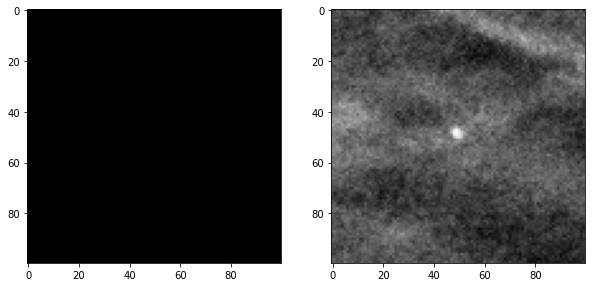

In [21]:
patch_idx = 0
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(roi_mask_patches[patch_idx],cmap='gray')
print('mask sum: ',roi_mask_patches[idx].sum())
ax[1].imshow(roi_img_patches[patch_idx],cmap='gray')

In [167]:
def padd_roi_custom(image: np.ndarray,roi_bbox_dims: tuple,bbox_coords: list, window_size: int,):
    """
    Selects corresponding padding and enlarge the given target roi to ensure
    of the roi with a given window size and any stride multiple of it.

    Args:
        image (np.ndarray): Original image where padded roi will be extracted.
        roi_bbox_dims (tuple): Target roi pixel dimensions, as (height (rows), width (columns)).
        bbox_coords (list): Bounding box coordinates of target roi, as [(top left coordinates),(bottom right coordinates)].
        window_size (int): Window size of slicing.

    Returns:
        padded roi (np.ndarray): target roi padded for consequent slicing
    """
    padded_x_len = int(np.ceil(roi_bbox_dims[0] / window_size) * window_size - roi_bbox_dims[0])
    padded_y_len = int(np.ceil(roi_bbox_dims[1] / window_size) * window_size - roi_bbox_dims[1])
    return image[(bbox_coords[0][1]-padded_y_len//2+padded_y_len%2):(bbox_coords[1][1]+padded_y_len//2)+1,
           (bbox_coords[0][0]-padded_x_len//2+padded_x_len%2):(bbox_coords[1][0]+padded_x_len//2)+1]

In [169]:
rois_subset_df.describe

<bound method NDFrame.describe of               case_id    img_id side view  area        center  center_crop  \
218  e634830794f5c1bd  20587294    R   CC   0.0  (1046, 1552)   (62, 1552)   
219  e634830794f5c1bd  20587294    R   CC   0.0  (1574, 2655)  (590, 2655)   

     dev  index_in_image  max  ...  micros  distortion  asymmetry  \
218  0.0               1  0.0  ...     1.0         0.0        0.0   
219  0.0               2  0.0  ...    True       False      False   

    finding_notes lesion_annot pectoral_muscle  artifact    lesion_type  \
218        micros          yes           False     False  calcification   
219        micros          yes           False     False  calcification   

     radius partition  
218  0.0001     train  
219  0.0001     train  

[2 rows x 34 columns]>

In [78]:
bbox_coords = rois_subset_df['lesion_bbox_crop'].apply(literal_eval).values
bbox_coords[0]
bbox_coords = bbox_coords[0]
roi_bb_dims = (bbox_coords[1][0] - bbox_coords[0][0] + 1,bbox_coords[1][1] - bbox_coords[0][1] + 1)
print(f'bounding box coords: {bbox_coords}')
print(f'roi bb dimensions: {roi_bb_dims}')
padded_patch = padd_roi_custom(image,roi_bb_dims,bbox_coords,patch_size)
# padded_x_len = int(np.ceil(roi_bb_dims[0] / patch_size) * patch_size - roi_bb_dims[0])
# padded_y_len = int(np.ceil(roi_bb_dims[1] / patch_size) * patch_size - roi_bb_dims[1])

# print('padded lenghts x and y:',padded_x_len,padded_y_len)

# begin_row = (bbox_coords[0][1]-padded_x_len//2+padded_x_len%2)
# end_row = (bbox_coords[1][1]+padded_x_len//2)
# begin_col = (bbox_coords[0][0]-padded_y_len//2+padded_y_len%2)
# end_col = (bbox_coords[1][0]+padded_y_len//2)

# padded_patch = image[begin_row:end_row,begin_col:end_col]

# print(begin_row,end_row,begin_col,end_col)

bounding box coords: [(691, 3063), (703, 3076)]
roi bb dimensions: (13, 14)


In [144]:
rescaled_patch = (255*(roi_img_patches[0]/roi_img_patches[0].max())).astype(np.uint8)

for idx,patch in enumerate(roi_img_patches):
    roi_img_patches[idx] = (255*(patch/patch.max())).astype(np.uint8)


In [147]:
cv2.imshow("test", roi_img_patches[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [205]:
roi_mask_patches[1].shape

(100, 100)

<IPython.core.display.Javascript object>

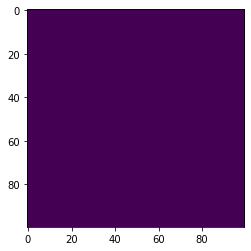

In [210]:
idx = 0
# plt.imshow(roi_img_patches[idx])
plt.imshow(roi_mask_patches[idx])
# plt.imshow(mask)
# # mask.sum()
# # print(rois_subset_df.stored)

In [127]:
np.shape(roi_mask_patches)

(128, 50, 50)

In [95]:
roi_img_patches

[array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], dtype=uint16),
 array([], d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

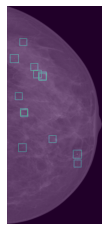

In [36]:
roi_mask = np.zeros(db[1]['img'].shape)
for i in db[1]['lesion_bboxes']:
    roi_mask = cv2.rectangle(roi_mask, (i[0][0]-50, i[0][1]-50), (i[1][0]+50, i[1][1]+50), 255, 3)
plt.figure()
plt.imshow(db[1]['img'], cmap='gray' )
plt.imshow(roi_mask, alpha=0.5)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

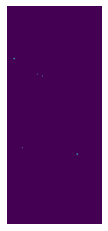

In [38]:
easy_plot(1)

In [14]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='rois',
        max_lesion_size_mm=1.0,
        extract_patches=True,
        extract_patches_method='all',  # 'centered'
        patch_size=256,
        stride=256,
        min_breast_fraction_roi=0.8,
        normalize=None,
        n_jobs=-1,
)

100%|██████████| 310/310 [00:32<00:00,  9.63it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

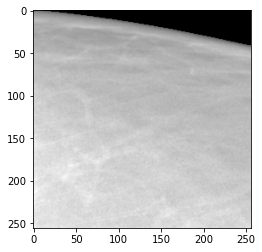

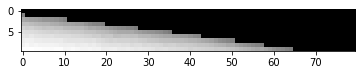

In [60]:
plt.figure()
plt.imshow(db[0]['img'], cmap='gray' )
db[0]['img'][:10,20:100].shape

plt.figure()
plt.imshow(db[0]['img'][:10,20:100], cmap='gray' )

In [20]:
dic1 = [{'1': 35,'2': 40}]
pd.DataFrame(dic1)

,1,2
0,35,40


In [50]:
coords = [(814, 3061), (815, 301)]
coords[1][0]

815

In [74]:
centers = db.rois_df['center_crop'].apply(literal_eval).values
centers[0][0]

814

In [71]:
bboxes = db.rois_df.loc[:,'lesion_bbox_crop'].apply(literal_eval).values
for i in bbox:
    print(i)
    break
bboxes[0][0][1]

[(814, 3061), (814, 3061)]


3061

In [98]:
7%2

1

In [45]:
db.rois_df[['center_crop','lesion_bbox_crop']].head(20)

,center_crop,lesion_bbox_crop
0,"(814, 3061)","[(814, 3061), (814, 3061)]"
1,"(1813, 1928)","[(1813, 1928), (1813, 1928)]"
2,"(917, 2775)","[(914, 2771), (921, 2779)]"
3,"(1622, 1151)","[(1622, 1151), (1622, 1151)]"
4,"(957, 2802)","[(957, 2802), (957, 2802)]"
5,"(1436, 1156)","[(1436, 1156), (1436, 1156)]"
6,"(1292, 656)","[(1292, 656), (1292, 656)]"
7,"(1172, 1633)","[(1172, 1633), (1172, 1633)]"
8,"(1178, 2143)","[(1178, 2143), (1178, 2143)]"
9,"(1183, 2143)","[(1183, 2143), (1183, 2143)]"


In [35]:
i = 0
print(f'num: {i}')

num: 0


In [96]:
for index,values in db.rois_df.iterrows():
    print(f'index: {index}')
    center = literal_eval(values['center_crop'])
    print(center[0])
    break

index: 0
814


In [41]:
bbox = db.rois_df.loc[0,'lesion_bbox_crop'].apply(literal_eval).values

AttributeError: 'str' object has no attribute 'apply'

In [32]:
db.rois_df.lesion_bbox_crop.apply(literal_eval).values

array([list([(814, 3061), (814, 3061)]),
       list([(1813, 1928), (1813, 1928)]),
       list([(914, 2771), (921, 2779)]), ...,
       list([(1000, 1438), (1000, 1438)]),
       list([(1140, 953), (1152, 966)]), list([(168, 2320), (168, 2320)])],
      dtype=object)

In [64]:
type(db.rois_df.lesion_bbox_crop[0])

str

In [40]:
# db.df.loc[db.df.img_id==22614499]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

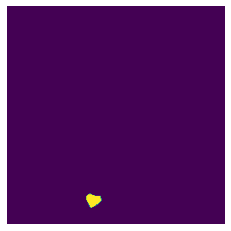

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

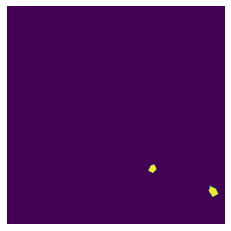

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

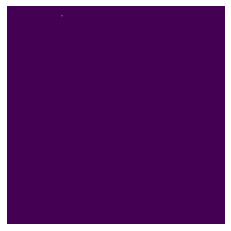

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

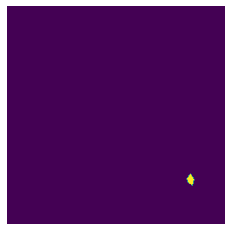

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

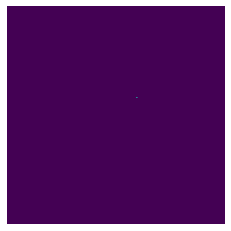

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

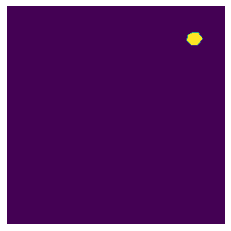

In [41]:
for i in range(56,98):
    if db[i]['lab'] == 'abnormal':
        easy_plot(i)

In [42]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='rois',
        max_lesion_size_mm=1.0,
        extract_rois=False,
        extract_rois_method='all',  # 'centered'
        roi_size=256,
        stride=256,
        min_breast_fraction_roi=0.8,
        normalize=None,
        n_jobs=-1,
)